# Titanic Sirvival test
## first we import the libraries that is useful for us to work with

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Then we import the data from the file to a pandas dataframe and check the data

In [ ]:
titanic_data=pd.read_csv('train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Then we check the datatypes of each columns
here,
(int or float) == numeric;
(object) == string

In [ ]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

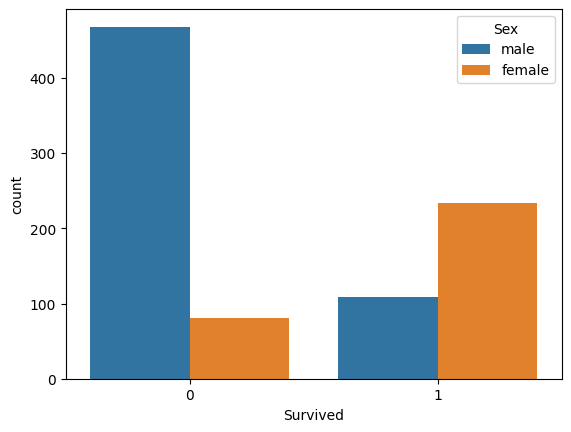

In [ ]:
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

In [ ]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [ ]:
titanic_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
titanic_data['Sex'] = titanic_data['Sex'].replace({'male':1, 'female':2})
titanic_data['Embarked'] = titanic_data['Embarked'].replace({'S':1, 'Q':2, 'C':3})

In [ ]:
titanic_data['Embarked'].fillna(2, inplace=True)

In [ ]:
titanic_data = titanic_data.set_index('PassengerId')
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,1.0
2,1,1,2,38.000000,1,0,71.2833,3.0
3,1,3,2,26.000000,0,0,7.9250,1.0
4,1,1,2,35.000000,1,0,53.1000,1.0
5,0,3,1,35.000000,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,1.0
888,1,1,2,19.000000,0,0,30.0000,1.0
889,0,3,2,29.699118,1,2,23.4500,1.0


In [ ]:
x=titanic_data[['Pclass','Age','SibSp','Parch','Fare','Sex', 'Embarked']]
y=titanic_data['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_model.score(X_test, y_test)

0.7937219730941704

In [ ]:
lr=LogisticRegression()
lr.fit(x, y)

LogisticRegression()

In [ ]:
Test_data = pd.read_csv('test.csv')
Test_data['Age'].fillna(Test_data['Age'].mean(),inplace=True)
Test_data['Fare'].fillna(Test_data['Fare'].mean(),inplace=True)
Test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
Test_data['Sex'] = Test_data['Sex'].replace({'male':1, 'female':2})
Test_data['Embarked'] = Test_data['Embarked'].replace({'S':1, 'Q':2, 'C':3})
Test_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
Test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.50000,0,0,7.8292,2
1,893,3,2,47.00000,1,0,7.0000,1
2,894,2,1,62.00000,0,0,9.6875,2
3,895,3,1,27.00000,0,0,8.6625,1
4,896,3,2,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,1
414,1306,1,2,39.00000,0,0,108.9000,3
415,1307,3,1,38.50000,0,0,7.2500,1
416,1308,3,1,30.27259,0,0,8.0500,1


In [ ]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [ ]:
x = Test_data[['Pclass','Age','SibSp','Parch','Fare','Sex', 'Embarked']]
output = lr.predict(x)

In [ ]:
submission = pd.DataFrame({'PassengerId': Test_data['PassengerId'], 'Survived': output})
submission.to_csv('submission.csv', index=False)